In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
#from pip._internal.operations.freeze import freeze
#for requirement in freeze(local_only=True):
#    print(requirement)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/1_Clustering_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/1_clustering/filter="+str(filter_size)+"/"

# Step 1 Load all saved result

In [2]:
# --------------- load result --------------- #
pp_text_emb = ["tf", "tf_idf", "lsa", "pv_dm", "pv_dbow"]
pp_citation_emb = ["off","n2v"]
author_group = []
k_mean_result = []
AHC_single_result = []
AHC_complete_result = []
AHC_average_result = []
AHC_ward_result = []
prevent_repeat_load = []
for text_emb in pp_text_emb:
    for citation_emb in pp_citation_emb:
        if text_emb is "off" and citation_emb is "off":
            break
        if text_emb is "tf" or text_emb is "tf_idf":
            citation_emb="off"
        result_filename = "citation="+citation_emb+"_textual="+text_emb+"_threshold="+str(filter_size)+".csv"
        if result_filename in prevent_repeat_load:
            break
        print(text_emb+" "+citation_emb)
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        prevent_repeat_load.append(result_filename)
        # save result in array
        author_group.append(result["Name Group"].values)
        k_mean_result.append(result["kmean_Pf1"].values)
        AHC_single_result.append(result["AHC_single_Pf1"].values)
        AHC_complete_result.append(result["AHC_complete_Pf1"].values)
        AHC_average_result.append(result["AHC_average_Pf1"].values)
        AHC_ward_result.append(result["AHC_ward_Pf1"].values)
        
author_group = list(set(map(tuple, author_group)))
author_group = [name for tup in author_group for name in tup]

tf off
tf_idf off
lsa off
lsa n2v
pv_dm off
pv_dm n2v
pv_dbow off
pv_dbow n2v


In [3]:
# --------- axs fix for subplot ---------- #
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

# Step 2: Plot 1: all groups w.r.t different embedding method

In [4]:
clustering_methods = ["K_mean","AHC single","AHC complete", "AHC average", "AHC ward"]
embedding_methods = ["TF","TF-IDF","LSA", "LSA&n2v","PV-DM","PV-DM&n2v","PV-DBOW","PV-DBOW&n2v"]

In [5]:
# ------------- sort result -------------------#
# print(embedding_methods)
# for row_idx,method in enumerate(embedding_methods):
#     print(np.mean(k_mean_result[row_idx]))

# #-------------- reformate result -------------- #
# k_mean_result_authorwise = []
# for col_idx,author in enumerate(author_group):
#     author_result = []
#     for row_idx,method in enumerate(embedding_methods):
#         author_result.append(k_mean_result[row_idx][col_idx])
#     k_mean_result_authorwise.append(author_result)
# print(k_mean_result_authorwise)

#-------------- reformate result -------------- #
all_result_clusterwise = []
all_result_clusterwise.append(k_mean_result)
all_result_clusterwise.append(AHC_single_result)
all_result_clusterwise.append(AHC_complete_result)
all_result_clusterwise.append(AHC_average_result)
all_result_clusterwise.append(AHC_ward_result)

# all_result_reformated = []
# for result in all_result_clusterwise:
#     result_reformated = []
#     #print(result)
#     for col_idx,author in enumerate(result):
#         author_result = []
#         for row_idx,method in enumerate(embedding_methods):
#             author_result.append(result[row_idx][col_idx])
#         result_reformated.append(author_result)
#     #print(result_reformated)
#     all_result_reformated.append(result_reformated)

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.8927326615808678
0.8550945010226239
0.8919045825800309
0.8119870579091469
0.8602093950774752
0.9139647243974294
0.9445458937769554
0.9360122881458458
check


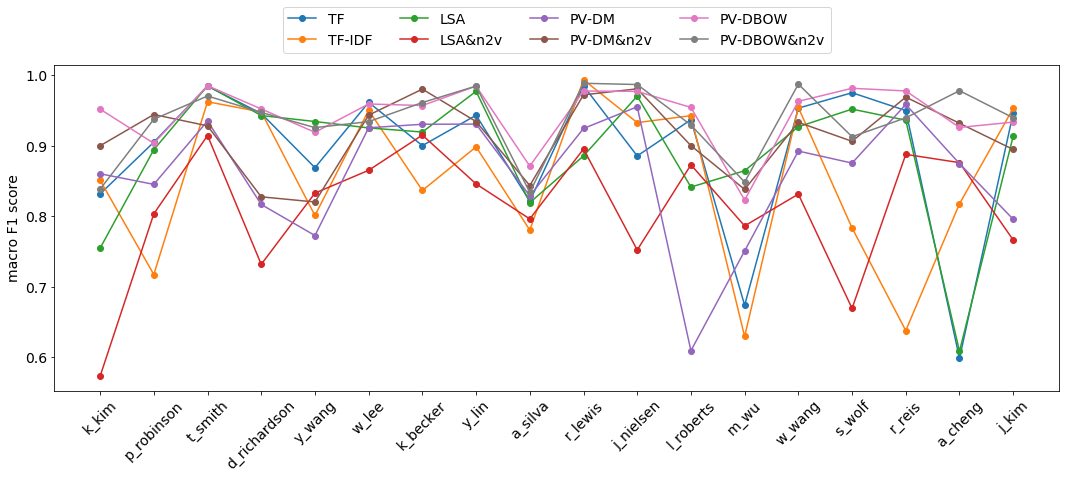

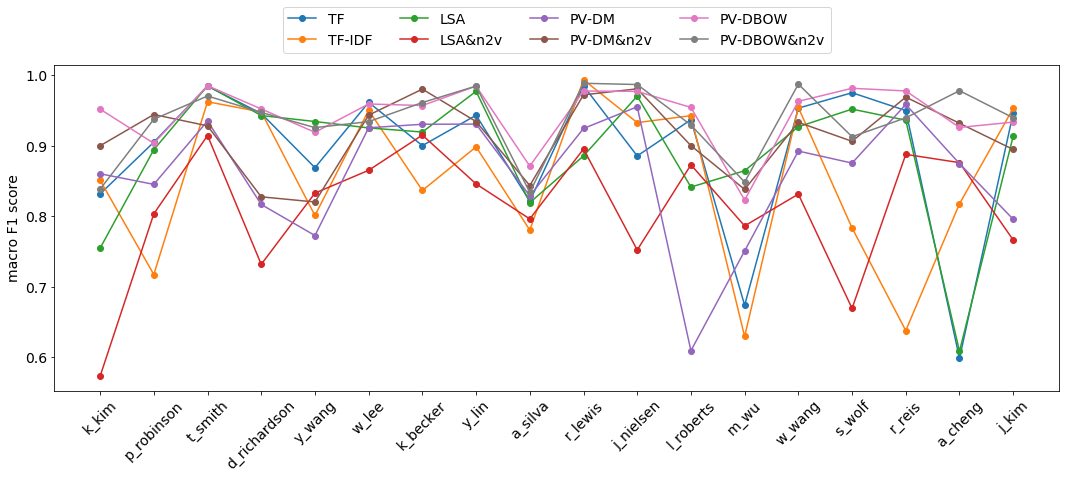

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.6658644820476805
0.665393060137846
0.6659482808529952
0.6658230571982712
0.6655453478466251
0.6656018875703043
0.666009466562724
0.6662522991431659
check


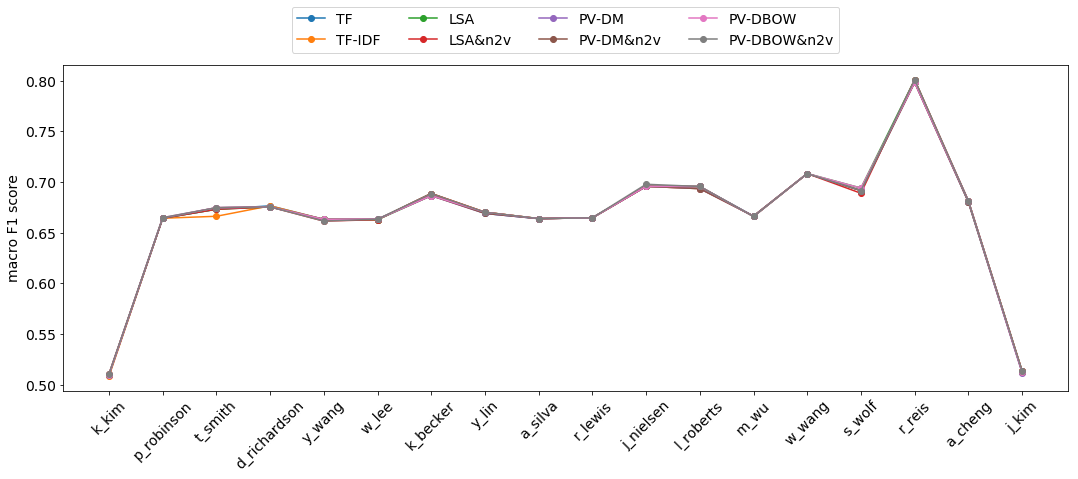

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.7075341593642803
0.6555188593215139
0.7003656544305497
0.6976684504350207
0.7434053640254581
0.7315873392526601
0.8709487847640566
0.7834579768211479
check


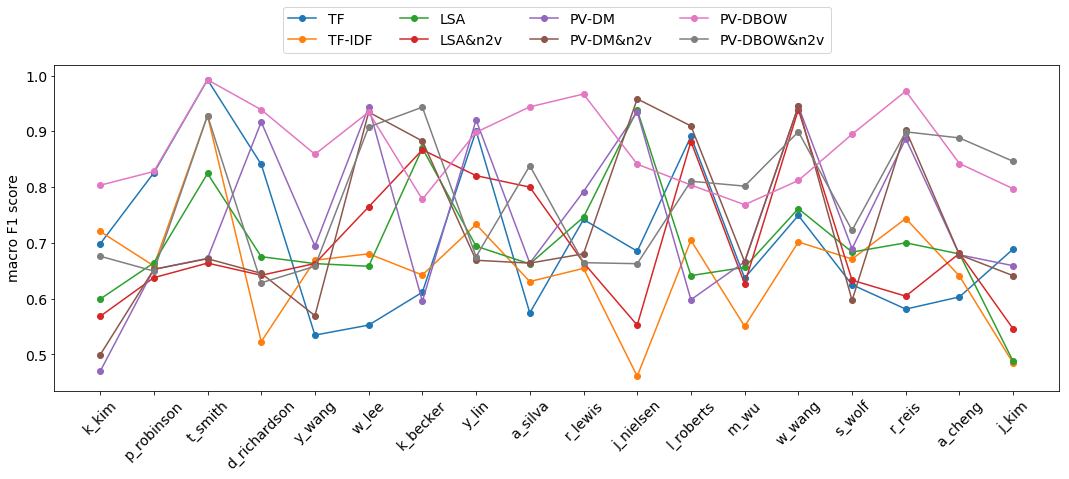

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.7107853931069704
0.7113135947010858
0.6658485722747179
0.6649782855703636
0.6651029623345444
0.6660193740755318
0.7514437781206054
0.7365808342962217
check


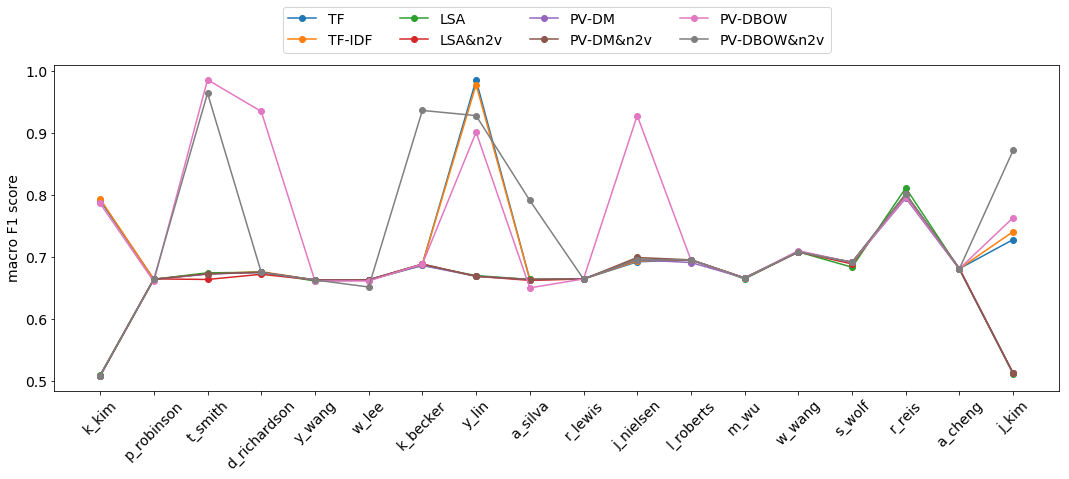

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.8776420378787042
0.8203760632722795
0.8506634160716318
0.8058791250247289
0.8561997771200791
0.9038492081498115
0.9205799132113318
0.9177078978369505
check


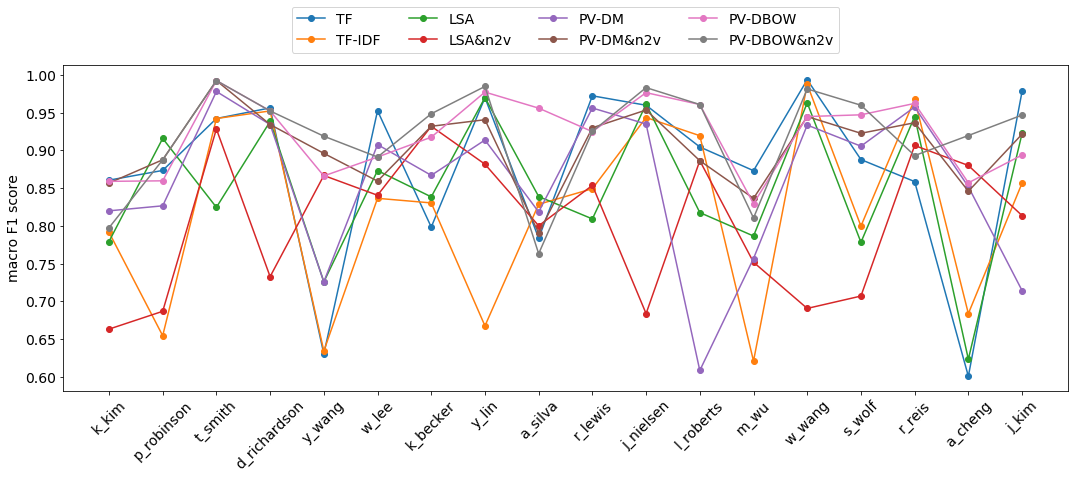

In [8]:
import math
import collections
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (18, 6)
all_dataset_mean_result_clusterwise = collections.defaultdict(list)

for idx, (result,method) in enumerate(zip(all_result_clusterwise,clustering_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(embedding_methods)
    curr_method_all_dataset_mean = []
    for emb,emb_label in zip(result, embedding_methods):
        axs.plot(emb, marker='o',label=emb_label)
        print(np.mean(emb))
        curr_method_all_dataset_mean.append(np.mean(emb))
    all_dataset_mean_result_clusterwise[method]=curr_method_all_dataset_mean
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        print("check")
        plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

No handles with labels found to put in legend.


check


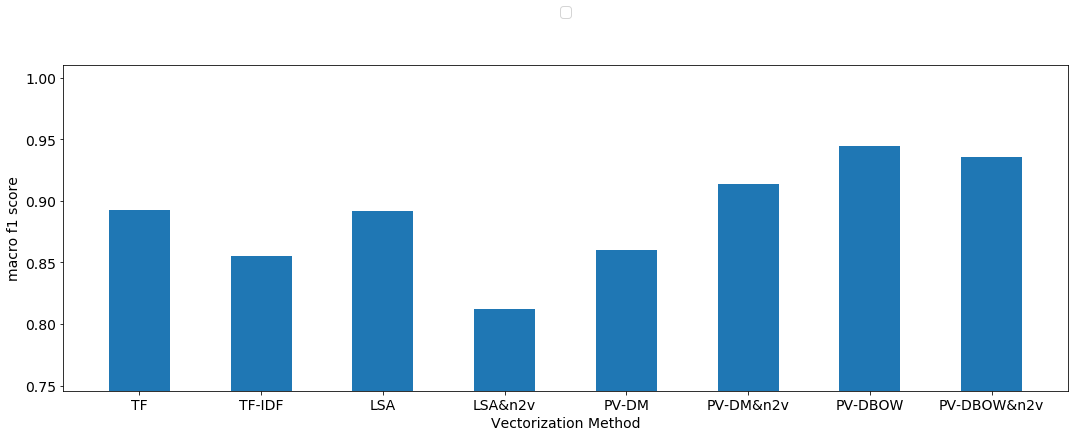

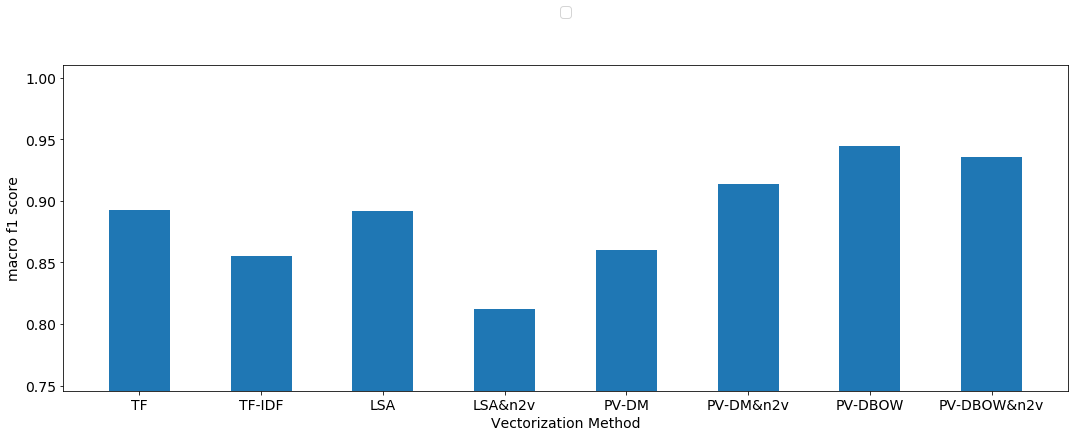

No handles with labels found to put in legend.


check


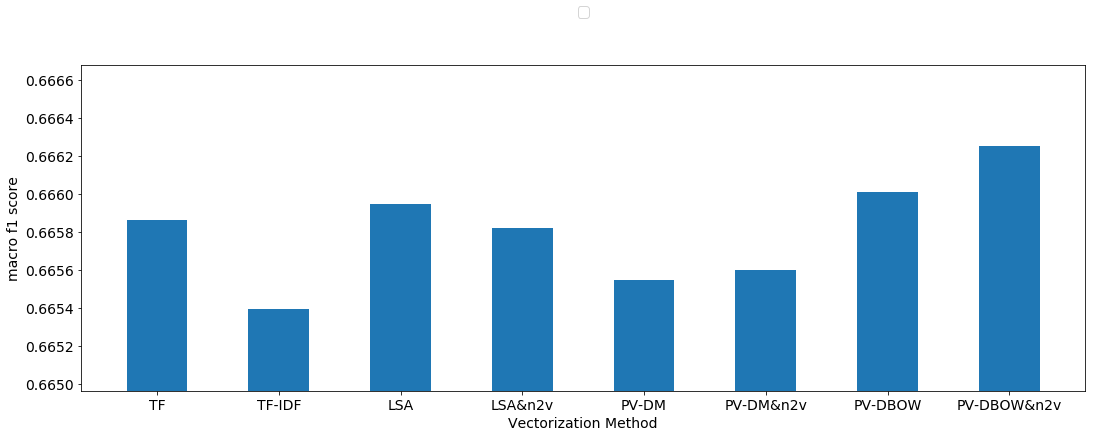

No handles with labels found to put in legend.


check


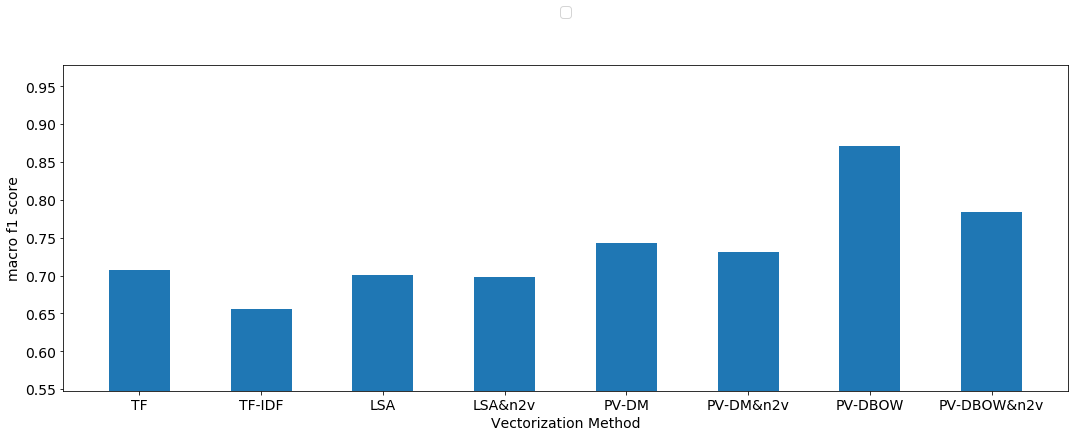

No handles with labels found to put in legend.


check


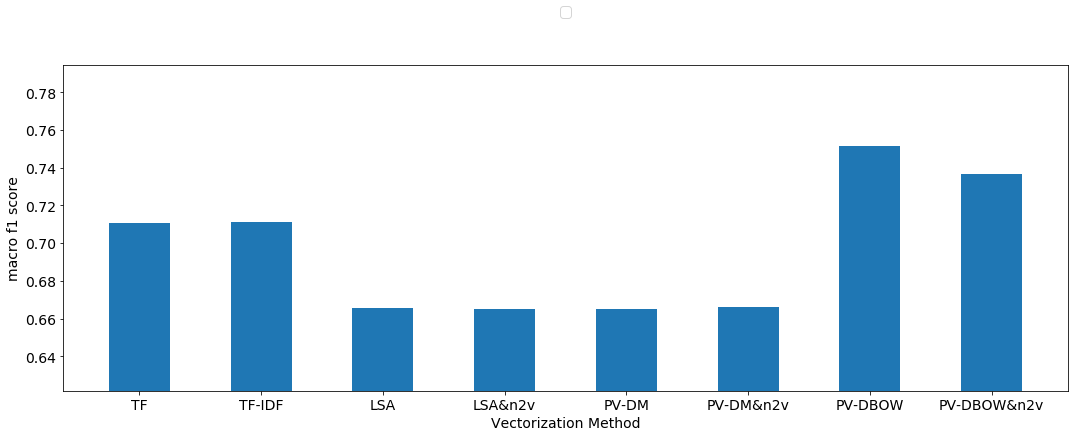

No handles with labels found to put in legend.


check


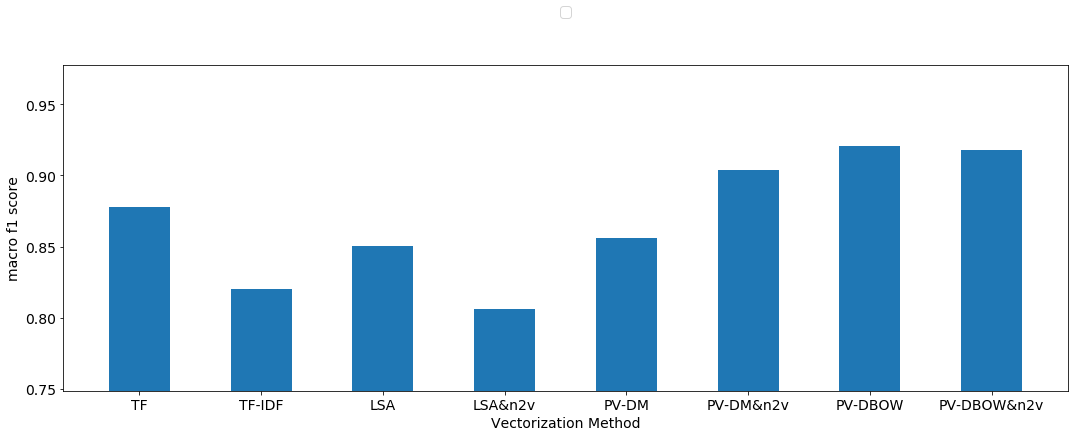

In [11]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (18, 6)

for method,result in all_dataset_mean_result_clusterwise.items():
    fig, ax = plt.subplots(figsize=figsize)
    low = min(result)
    high = max(result)
    plt.ylim([low-0.5*(high-low), high+0.5*(high-low)])
    plt.bar(embedding_methods, result, width=0.5)
    legend=ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    ax.autoscale_view()
    plt.xlabel('Vectorization Method')
    plt.ylabel('macro f1 score')
    try:
        print("check")
        plt.savefig(fname=fig_save_path+"average_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"average_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

# Step 2: Plot 2: average w.r.t different embedding method

In [12]:
import collections

average_result = collections.defaultdict(list)
for result, method in zip(all_result_clusterwise,clustering_methods):
    average_result[method] = [np.mean(sublist) for sublist in result]
print(average_result)

defaultdict(<class 'list'>, {'K_mean': [0.8927326615808678, 0.8550945010226239, 0.8919045825800309, 0.8119870579091469, 0.8602093950774752, 0.9139647243974294, 0.9445458937769554, 0.9360122881458458], 'AHC single': [0.6658644820476805, 0.665393060137846, 0.6659482808529952, 0.6658230571982712, 0.6655453478466251, 0.6656018875703043, 0.666009466562724, 0.6662522991431659], 'AHC complete': [0.7075341593642803, 0.6555188593215139, 0.7003656544305497, 0.6976684504350207, 0.7434053640254581, 0.7315873392526601, 0.8709487847640566, 0.7834579768211479], 'AHC average': [0.7107853931069704, 0.7113135947010858, 0.6658485722747179, 0.6649782855703636, 0.6651029623345444, 0.6660193740755318, 0.7514437781206054, 0.7365808342962217], 'AHC ward': [0.8776420378787042, 0.8203760632722795, 0.8506634160716318, 0.8058791250247289, 0.8561997771200791, 0.9038492081498115, 0.9205799132113318, 0.9177078978369505]})


K_mean
[0.8927326615808678, 0.8550945010226239, 0.8919045825800309, 0.8119870579091469, 0.8602093950774752, 0.9139647243974294, 0.9445458937769554, 0.9360122881458458]
AHC single
[0.6658644820476805, 0.665393060137846, 0.6659482808529952, 0.6658230571982712, 0.6655453478466251, 0.6656018875703043, 0.666009466562724, 0.6662522991431659]
AHC complete
[0.7075341593642803, 0.6555188593215139, 0.7003656544305497, 0.6976684504350207, 0.7434053640254581, 0.7315873392526601, 0.8709487847640566, 0.7834579768211479]
AHC average
[0.7107853931069704, 0.7113135947010858, 0.6658485722747179, 0.6649782855703636, 0.6651029623345444, 0.6660193740755318, 0.7514437781206054, 0.7365808342962217]
AHC ward
[0.8776420378787042, 0.8203760632722795, 0.8506634160716318, 0.8058791250247289, 0.8561997771200791, 0.9038492081498115, 0.9205799132113318, 0.9177078978369505]
check


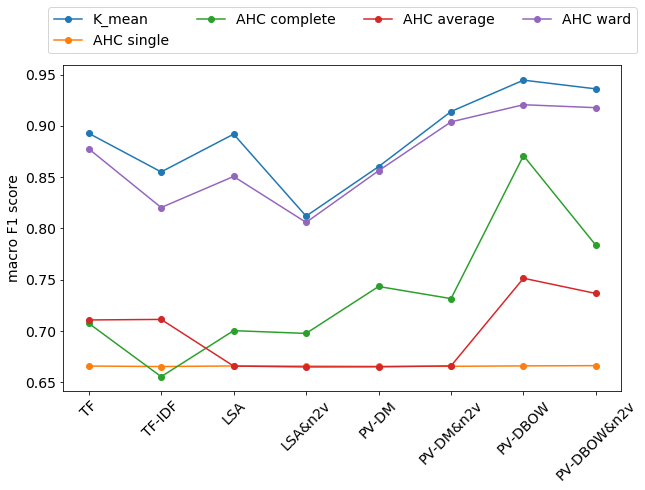

In [14]:
figsize = (10, 6)
fig, axs = plt.subplots(figsize=figsize)
plt.setp(axs, xticks=range(len(embedding_methods)), xticklabels=embedding_methods)
plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
for method, result in average_result.items():
    print(method)
    print(result)
    axs.plot(result, marker='o',label=method)
legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
plt.ylabel('macro F1 score')
try:
    print("check")
    #plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_all_method_average_f1.png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
except:
    if not os.path.exists(fig_save_path):
        os.makedirs(fig_save_path)
    #plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_all_method_average_f1.png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# Step 3: Plot w.r.t different clustering method

In [15]:
all_result_clusterwise

[[array([0.83165373, 0.90521105, 0.98476141, 0.94604054, 0.86899527,
         0.96182007, 0.90032618, 0.94346622, 0.82139345, 0.98528704,
         0.88567798, 0.93718574, 0.67351756, 0.95360506, 0.97547143,
         0.95011965, 0.59822943, 0.9464261 ]),
  array([0.8511372 , 0.71717534, 0.96266624, 0.94815404, 0.80106123,
         0.95057131, 0.83660797, 0.89853025, 0.7803351 , 0.99394042,
         0.93296957, 0.94293424, 0.62913927, 0.9545306 , 0.78334353,
         0.63753082, 0.81766352, 0.95341038]),
  array([0.75460238, 0.89455029, 0.98540106, 0.94311539, 0.93457545,
         0.92546548, 0.91963633, 0.97748822, 0.81932487, 0.88564979,
         0.97071513, 0.84142953, 0.86466923, 0.92707752, 0.95218257,
         0.9364391 , 0.60812759, 0.91383257]),
  array([0.57264858, 0.8034472 , 0.91469194, 0.73168132, 0.83286666,
         0.86527991, 0.91529318, 0.84589832, 0.79616555, 0.89552927,
         0.75206739, 0.87307076, 0.78627984, 0.83142483, 0.66908335,
         0.8879107 , 0.87615637

In [16]:
#--------- reformate ------------- #
all_result_embeddingwise=list(zip(*all_result_clusterwise))
print(all_result_embeddingwise)

[(array([0.83165373, 0.90521105, 0.98476141, 0.94604054, 0.86899527,
       0.96182007, 0.90032618, 0.94346622, 0.82139345, 0.98528704,
       0.88567798, 0.93718574, 0.67351756, 0.95360506, 0.97547143,
       0.95011965, 0.59822943, 0.9464261 ]), array([0.50931604, 0.66422182, 0.67308918, 0.67645675, 0.66314386,
       0.66279759, 0.68861301, 0.6689628 , 0.66387529, 0.66464261,
       0.69566158, 0.6955318 , 0.66634711, 0.70826726, 0.69152011,
       0.7982267 , 0.6813753 , 0.51351186]), array([0.69818182, 0.82577595, 0.99266409, 0.84086326, 0.53477418,
       0.5526839 , 0.61163775, 0.90094529, 0.5745012 , 0.74208915,
       0.68520766, 0.89099171, 0.63706253, 0.74934411, 0.6250865 ,
       0.58138063, 0.60329157, 0.68913357]), array([0.79123812, 0.66422182, 0.67308918, 0.67538141, 0.66314386,
       0.66329683, 0.68861301, 0.98491819, 0.66387529, 0.66464261,
       0.69227725, 0.6955318 , 0.66634711, 0.70826726, 0.69152011,
       0.7982267 , 0.6813753 , 0.72817124]), array([0.86061

TF
K_mean
0.8927326615808678
AHC single
0.6658644820476805
AHC complete
0.7075341593642803
AHC average
0.7107853931069704
AHC ward
0.8776420378787042
check


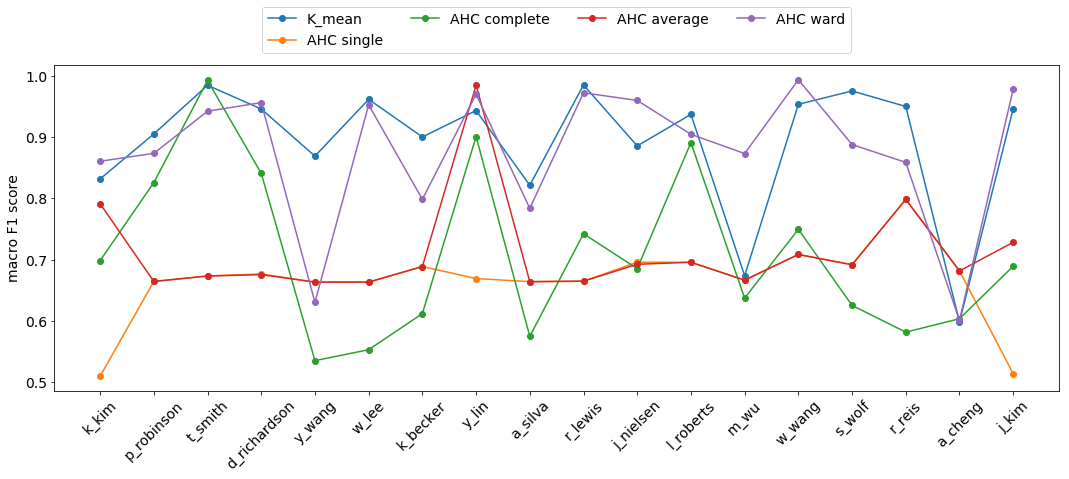

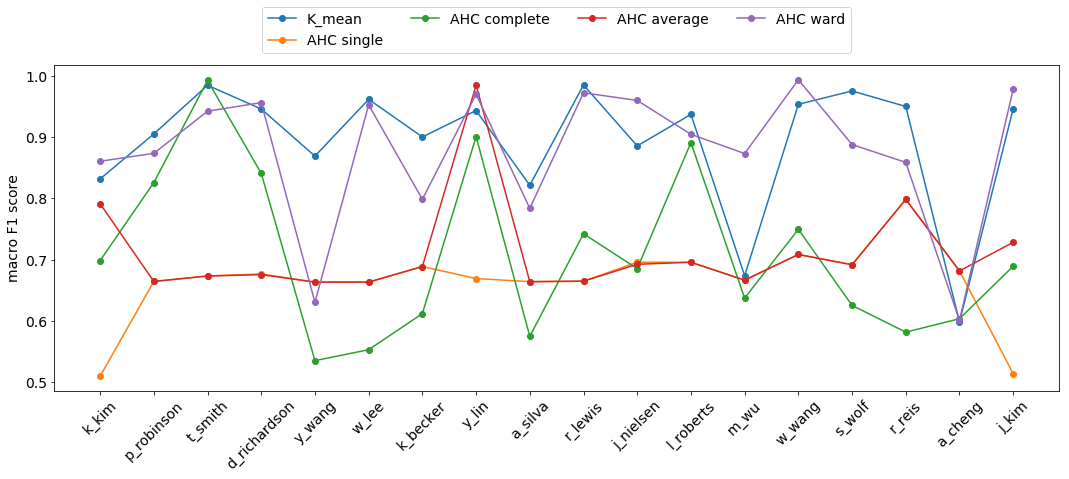

TF-IDF
K_mean
0.8550945010226239
AHC single
0.665393060137846
AHC complete
0.6555188593215139
AHC average
0.7113135947010858
AHC ward
0.8203760632722795
check


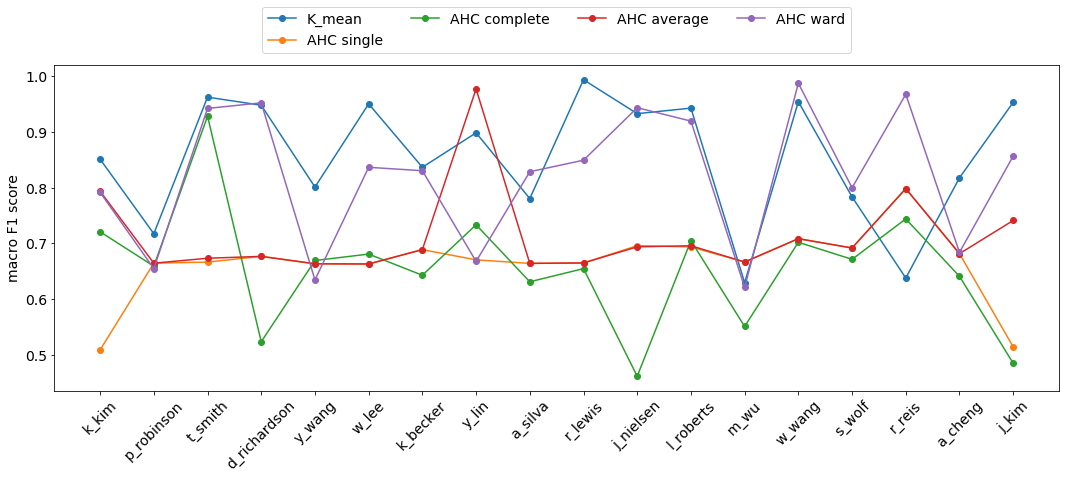

LSA
K_mean
0.8919045825800309
AHC single
0.6659482808529952
AHC complete
0.7003656544305497
AHC average
0.6658485722747179
AHC ward
0.8506634160716318
check


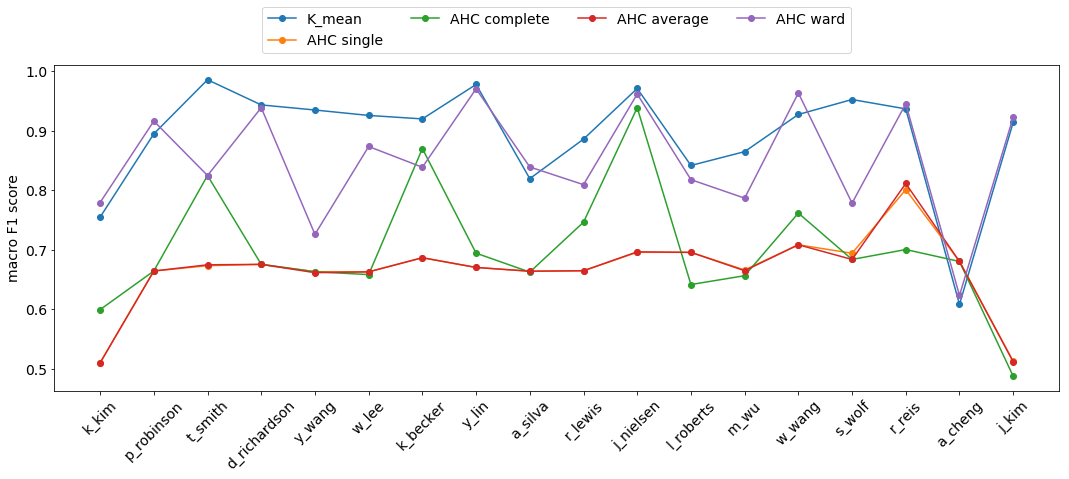

LSA&n2v
K_mean
0.8119870579091469
AHC single
0.6658230571982712
AHC complete
0.6976684504350207
AHC average
0.6649782855703636
AHC ward
0.8058791250247289
check


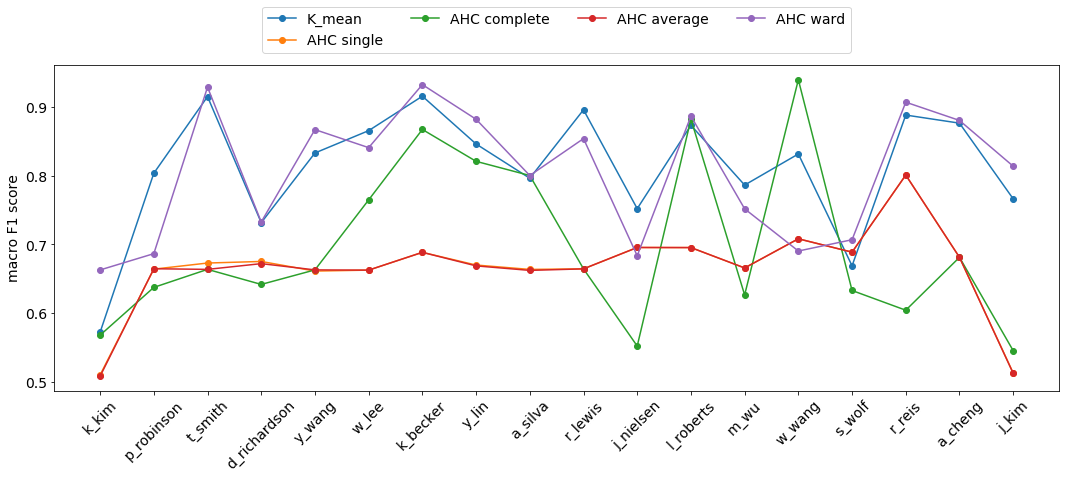

PV-DM
K_mean
0.8602093950774752
AHC single
0.6655453478466251
AHC complete
0.7434053640254581
AHC average
0.6651029623345444
AHC ward
0.8561997771200791
check


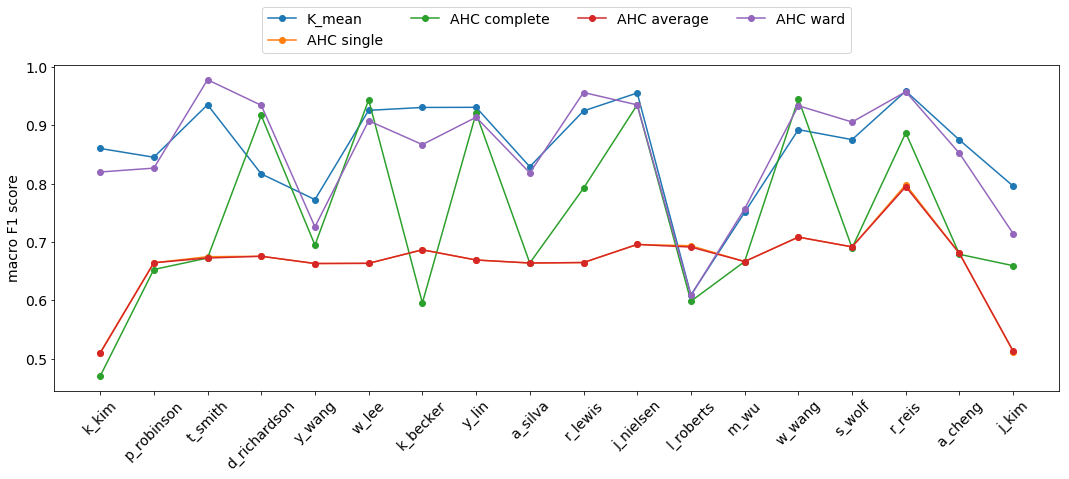

PV-DM&n2v
K_mean
0.9139647243974294
AHC single
0.6656018875703043
AHC complete
0.7315873392526601
AHC average
0.6660193740755318
AHC ward
0.9038492081498115
check


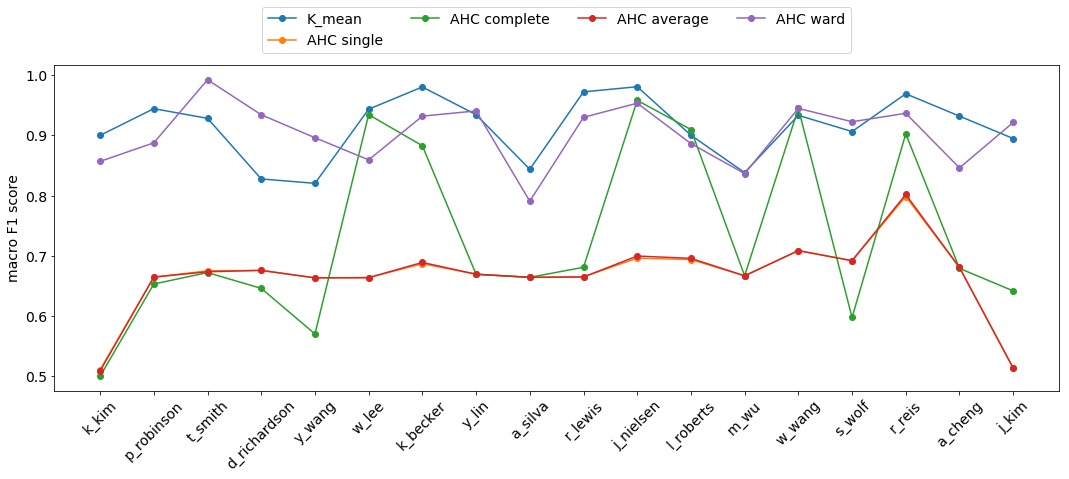

PV-DBOW
K_mean
0.9445458937769554
AHC single
0.666009466562724
AHC complete
0.8709487847640566
AHC average
0.7514437781206054
AHC ward
0.9205799132113318
check


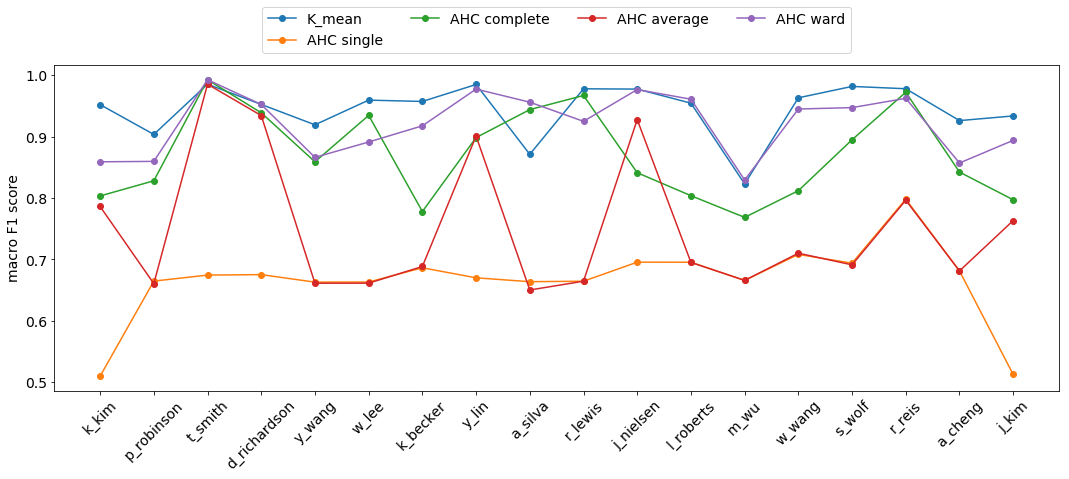

PV-DBOW&n2v
K_mean
0.9360122881458458
AHC single
0.6662522991431659
AHC complete
0.7834579768211479
AHC average
0.7365808342962217
AHC ward
0.9177078978369505
check


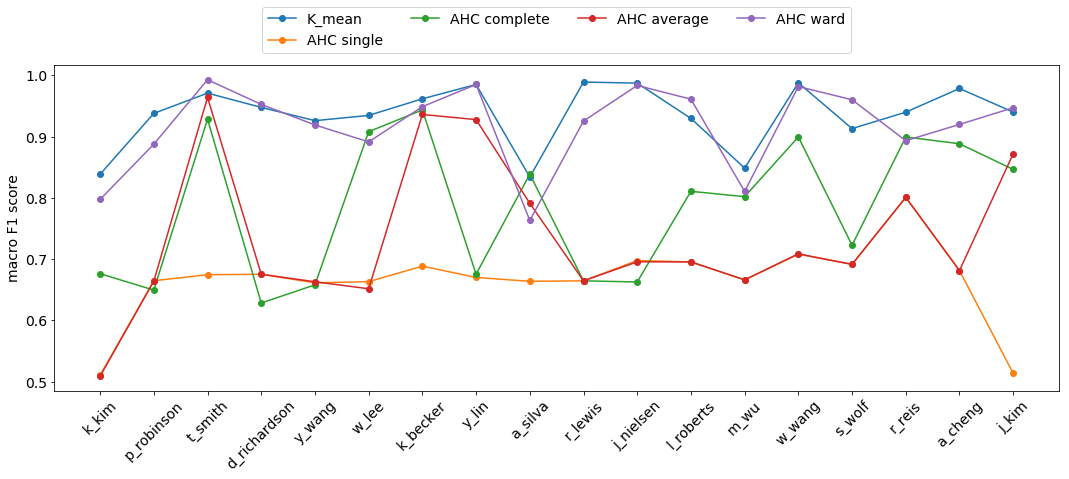

In [19]:
import math
import matplotlib.pyplot as plt

figsize = (18, 6)

all_dataset_mean_result_embeddingwise = collections.defaultdict(list)

for idx, (result,emb_method) in enumerate(zip(all_result_embeddingwise,embedding_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(emb_method)
    curr_embedding_all_dataset_mean = []
    for clustering_result,clustering_label in zip(result, clustering_methods):
        print(clustering_label)
        print(np.mean(clustering_result))
        curr_embedding_all_dataset_mean.append(np.mean(clustering_result))
        axs.plot(clustering_result, marker='o',label=clustering_label)
    all_dataset_mean_result_embeddingwise[emb_method] = curr_embedding_all_dataset_mean
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        print("check")
        plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_"+emb_method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_"+emb_method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

In [20]:
all_dataset_mean_result_embeddingwise

defaultdict(list,
            {'LSA': [0.8919045825800309,
              0.6659482808529952,
              0.7003656544305497,
              0.6658485722747179,
              0.8506634160716318],
             'LSA&n2v': [0.8119870579091469,
              0.6658230571982712,
              0.6976684504350207,
              0.6649782855703636,
              0.8058791250247289],
             'PV-DBOW': [0.9445458937769554,
              0.666009466562724,
              0.8709487847640566,
              0.7514437781206054,
              0.9205799132113318],
             'PV-DBOW&n2v': [0.9360122881458458,
              0.6662522991431659,
              0.7834579768211479,
              0.7365808342962217,
              0.9177078978369505],
             'PV-DM': [0.8602093950774752,
              0.6655453478466251,
              0.7434053640254581,
              0.6651029623345444,
              0.8561997771200791],
             'PV-DM&n2v': [0.9139647243974294,
              0.665601887570

No handles with labels found to put in legend.


TF
check


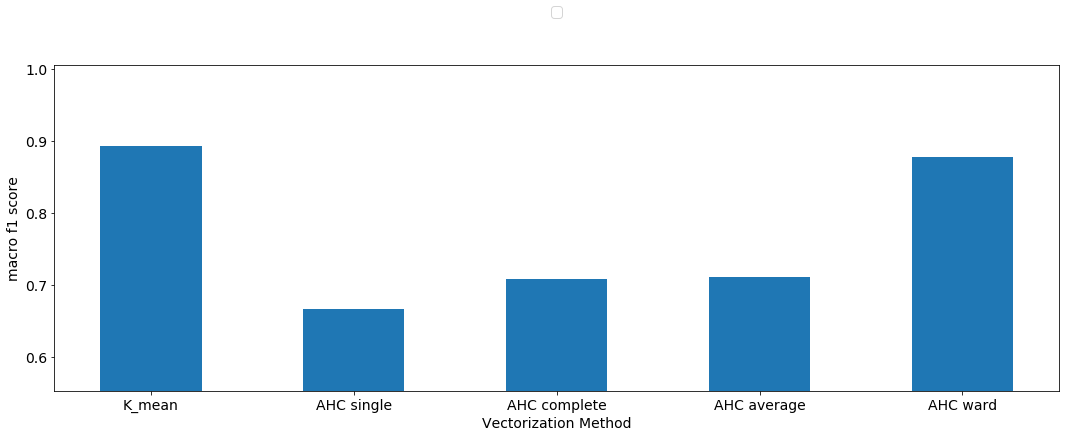

No handles with labels found to put in legend.


TF-IDF
check


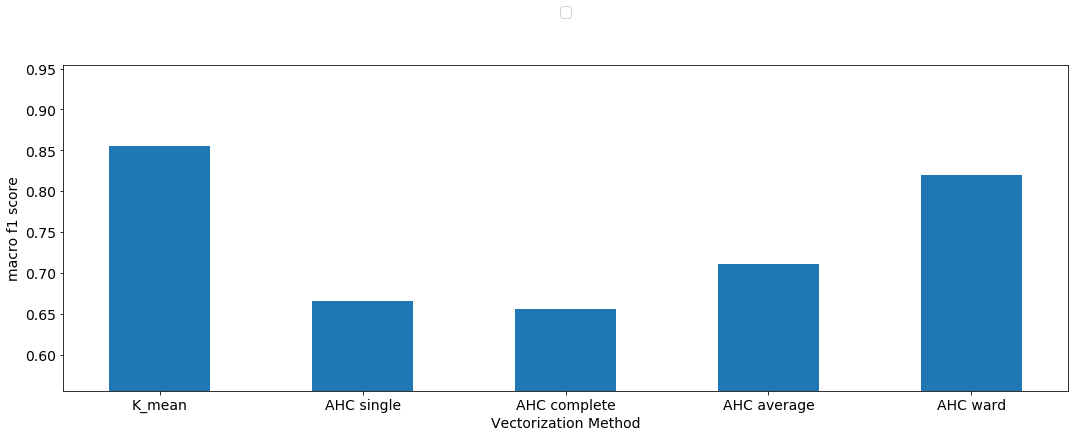

No handles with labels found to put in legend.


LSA
check


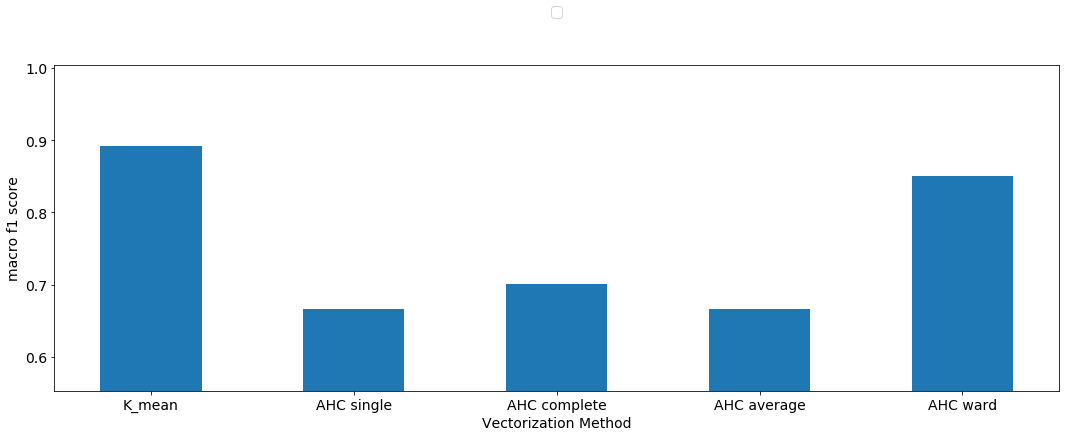

No handles with labels found to put in legend.


LSA&n2v
check


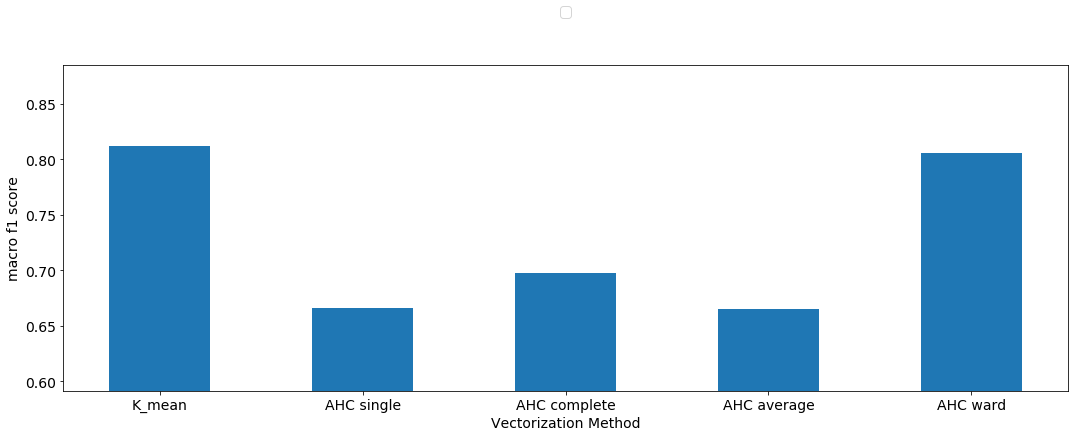

No handles with labels found to put in legend.


PV-DM
check


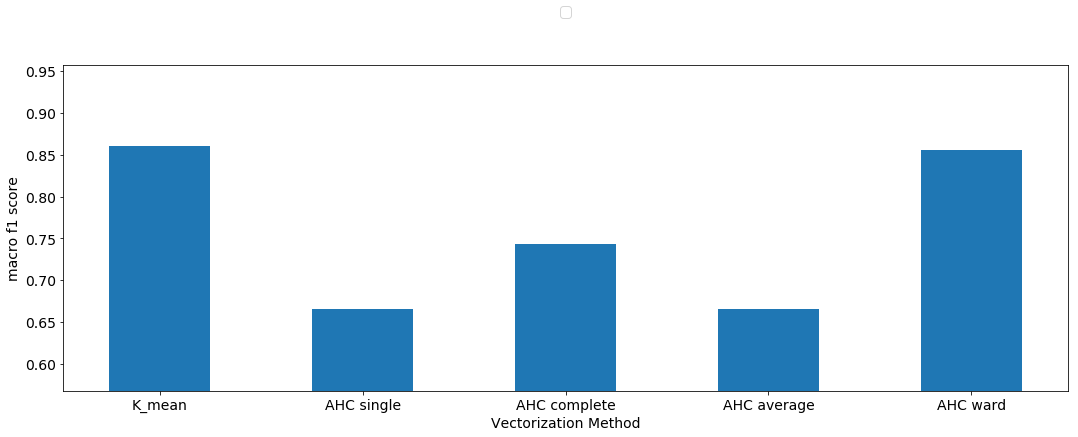

No handles with labels found to put in legend.


PV-DM&n2v
check


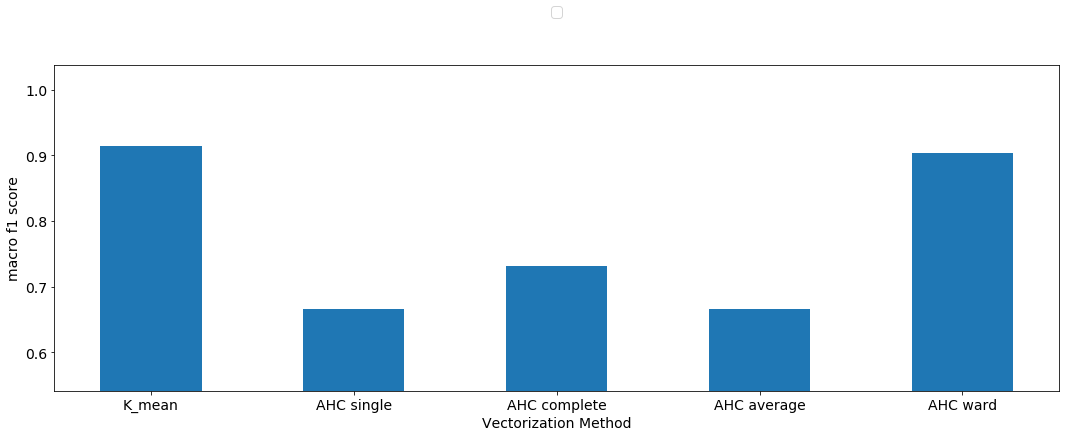

No handles with labels found to put in legend.


PV-DBOW
check


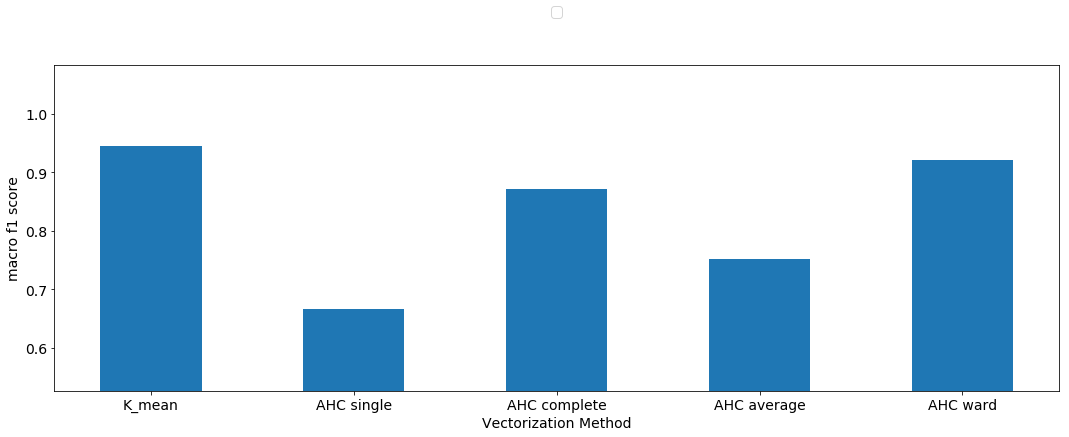

No handles with labels found to put in legend.


PV-DBOW&n2v
check


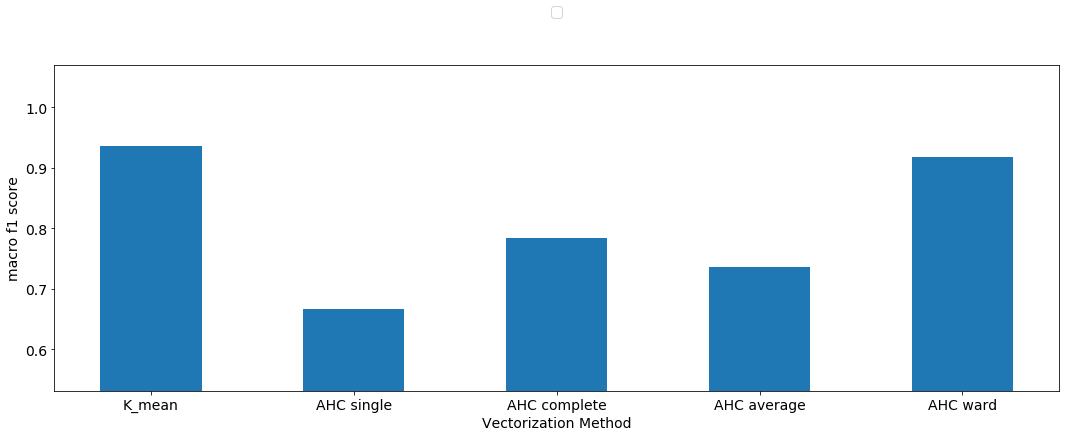

In [21]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (18, 6)

for method,result in all_dataset_mean_result_embeddingwise.items():
    fig, ax = plt.subplots(figsize=figsize)
    low = min(result)
    high = max(result)
    plt.ylim([low-0.5*(high-low), high+0.5*(high-low)])
    plt.bar(clustering_methods, result, width=0.5)
    legend=ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    ax.autoscale_view()
    plt.xlabel('Vectorization Method')
    plt.ylabel('macro f1 score')
    print(method)
    try:
        print("check")
        plt.savefig(fname=fig_save_path+"average_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"average_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()